In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

In [4]:
def plot_figure_10(noise_mode,seed):
    data_0_0 = pd.read_csv(f'../figure_10/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_0_Lcr_0.csv')
    data_1_0 = pd.read_csv(f'../figure_10/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_1_Lcr_0.csv')
    data_0_1 = pd.read_csv(f'../figure_10/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_0_Lcr_1.csv')
    data_1_1 = pd.read_csv(f'../figure_10/selection_history_dataset_cifar10_noisemode_{noise_mode}_seed_{seed}_R_1_Lcr_1.csv')


    plt.figure(figsize=(8, 6))


    # 각 데이터셋에 대한 그래프를 그림
    if noise_mode == 'instance':
        plt.axhline(30098, color='black', linestyle='-.', linewidth=2)
    elif noise_mode == 'pair':
        plt.axhline(30024, color='black', linestyle='-.', linewidth=2)
    elif noise_mode == 'sym':
        plt.axhline(30231, color='black', linestyle='-.', linewidth=2)

    plt.plot(data_0_0['epoch'], data_0_0['num_total_selection'], label='SFT', linestyle='-', color='red')
    plt.plot(data_0_0['epoch'], data_0_0['num_clean'], linestyle='--', color='red')
    plt.fill_between(data_0_0['epoch'], data_0_0['num_total_selection'], data_0_0['num_clean'], color='red', alpha=0.2)

    plt.plot(data_1_0['epoch'], data_1_0['num_total_selection'], label='w/o R', linestyle='-', color='green')
    plt.plot(data_1_0['epoch'], data_1_0['num_clean'], linestyle='--', color='green')
    plt.fill_between(data_1_0['epoch'], data_1_0['num_total_selection'], data_1_0['num_clean'], color='green', alpha=0.2)

    plt.plot(data_0_1['epoch'], data_0_1['num_total_selection'], label='w/o Lcr', linestyle='-', color='blue')
    plt.plot(data_0_1['epoch'], data_0_1['num_clean'], linestyle='--', color='blue')
    plt.fill_between(data_0_1['epoch'], data_0_1['num_total_selection'], data_0_1['num_clean'], color='blue', alpha=0.2)

    plt.plot(data_1_1['epoch'], data_1_1['num_total_selection'], label='w/o R, Lcr', linestyle='-', color='brown')
    plt.plot(data_1_1['epoch'], data_1_1['num_clean'], linestyle='--', color='brown')
    plt.fill_between(data_1_1['epoch'], data_1_1['num_total_selection'], data_1_1['num_clean'], color='brown', alpha=0.2)

    plt.xlabel('Epoch', fontsize=20, fontweight='bold')
    plt.ylabel('# Sample Number', fontsize=20, fontweight='bold')  # 강조
    plt.gca().yaxis.set_major_formatter(formatter)  # y축 레이블 형식 변경
    if noise_mode =='instance':
        plt.title('CIFAR-10 Inst. 40%', fontsize=25, fontweight='bold')
    else:
        plt.title('CIFAR-10 Pair. 40%', fontsize=25, fontweight='bold')

    plt.legend(fontsize=17)
    plt.grid(True)
    plt.show()

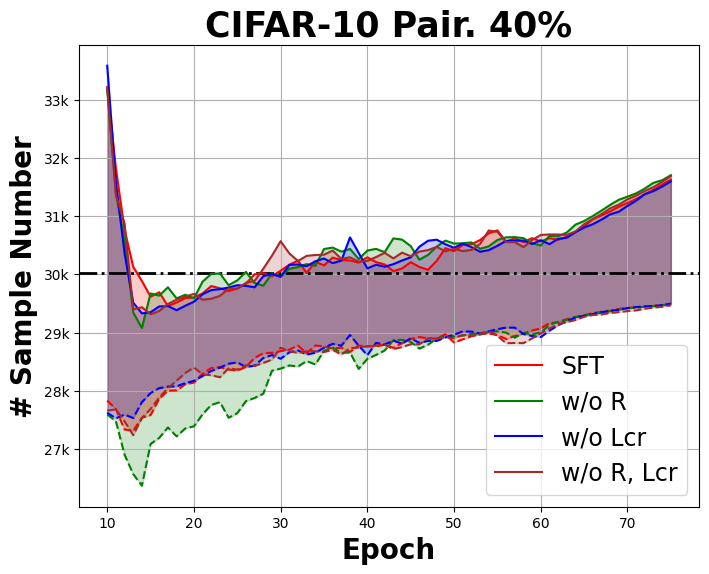

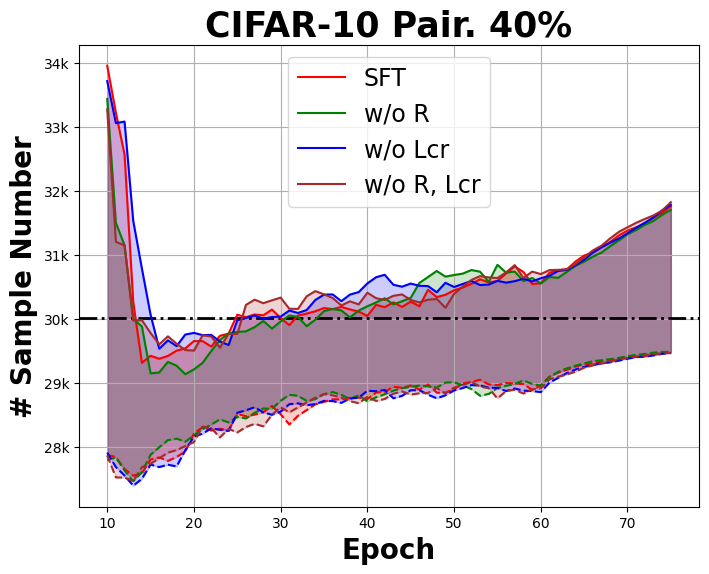

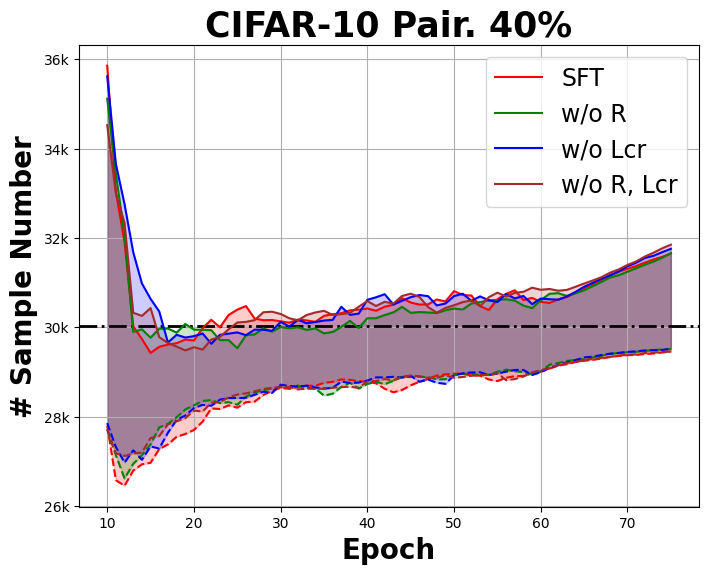

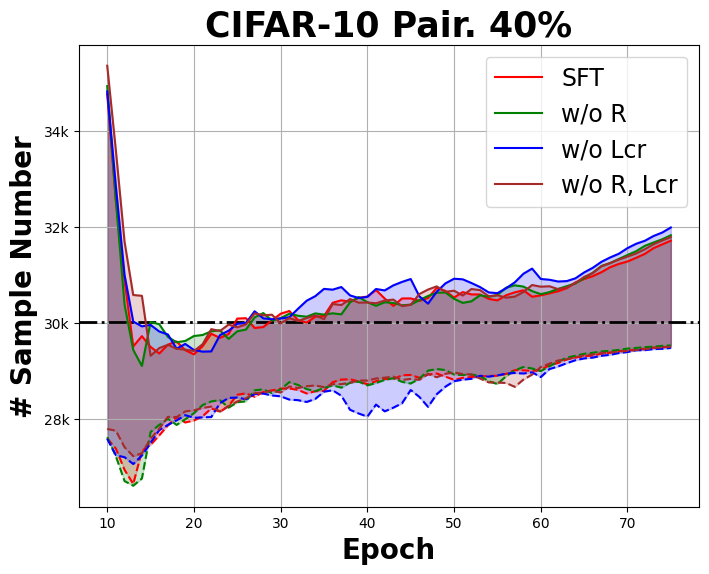

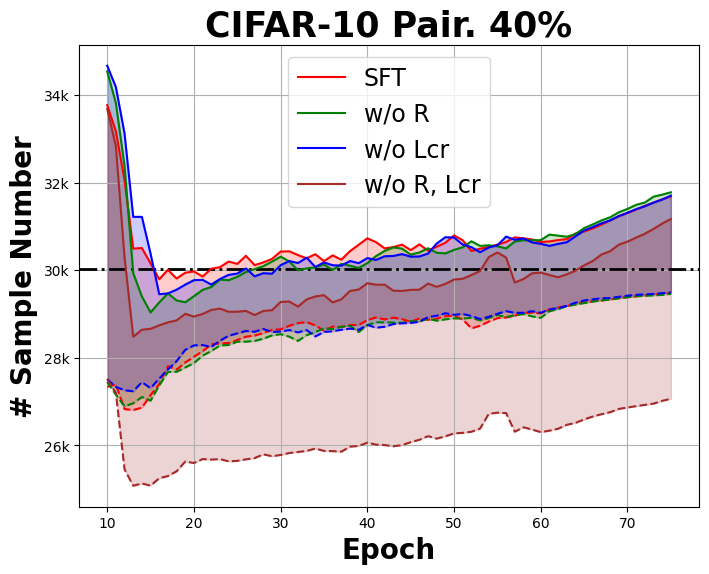

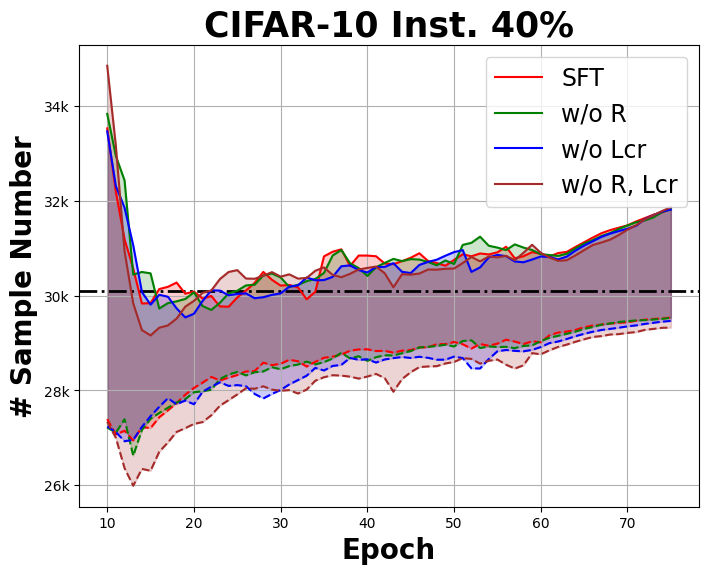

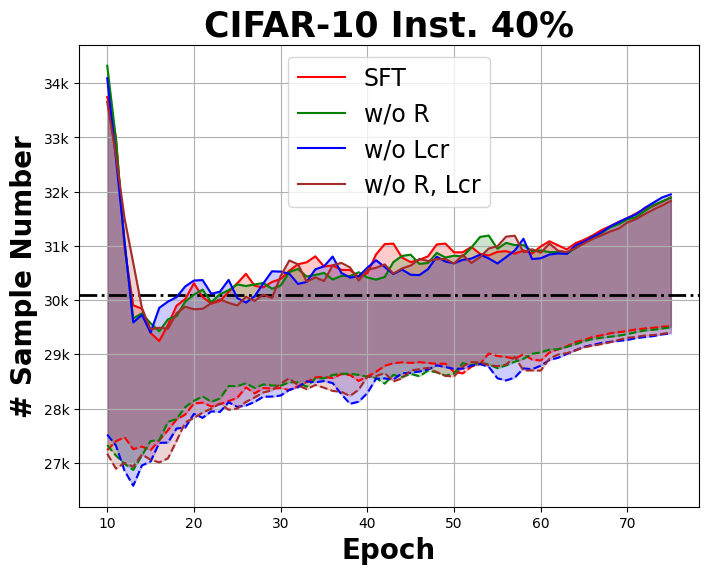

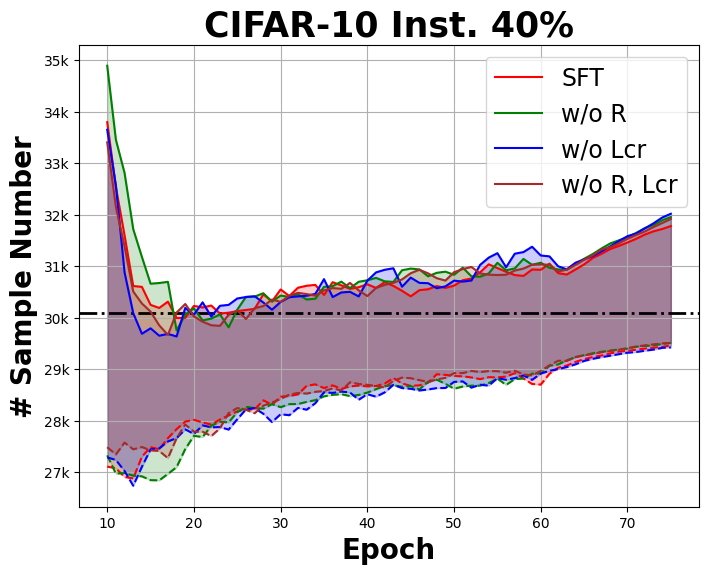

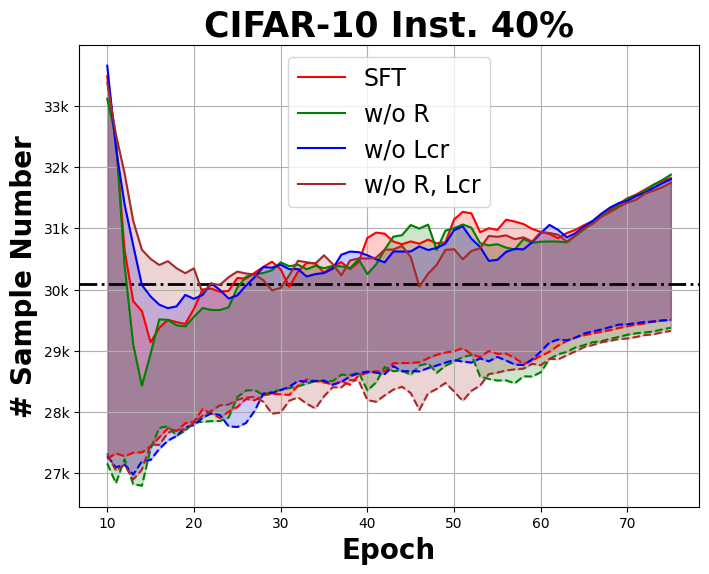

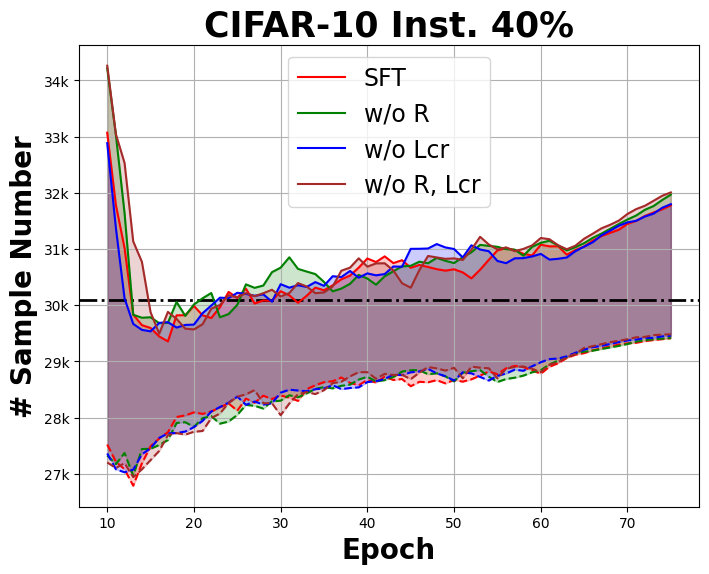

In [5]:
modes = ['pair','instance']
seeds = [1,2,3,4,5]
for mode in modes:
    for seed in seeds:
        plot_figure_10(mode,seed)